In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
path='/net/big-tank/POOL/users/pgutjahr/data/data/leading_muons/evaluation_01/Corsika_evaluated'
f1=h5py.File('/net/big-tank/POOL/users/pgutjahr/data/data/leading_muons/evaluation_01/Corsika_evaluated/30011/level2/00000-00999/Corsika_30011_level2_00000010.hdf5','r')
f2=h5py.File('/net/big-tank/POOL/users/pgutjahr/data/data/leading_muons/evaluation_01/Corsika_evaluated/30010/level2/00000-00999/Corsika_30010_level2_00000000.hdf5','r')
files0=glob.glob('/net/big-tank/POOL/users/pgutjahr/data/data/leading_muons/evaluation_01/Corsika_evaluated/30010/level2/00000-00999/*')
files1=glob.glob('/net/big-tank/POOL/users/pgutjahr/data/data/leading_muons/evaluation_01/Corsika_evaluated/30011/level2/00000-00999/*')
files2=glob.glob('/net/big-tank/POOL/users/pgutjahr/data/data/leading_muons/evaluation_01/Corsika_evaluated/30012/level2/00000-00999/*')
files3=glob.glob('/net/big-tank/POOL/users/pgutjahr/data/data/leading_muons/evaluation_01/Corsika_evaluated/30013/level2/00000-00999/*')
i=0
files=glob.glob('/net/big-tank/POOL/users/pgutjahr/data/data/leading_muons/evaluation_01/Corsika_evaluated/3001*/level2/00000-00999/*')
for file in files0:
    f=h5py.File(file,'r')
    print(np.size(f['MCLabelsLeadingMuons']['leading_energy_rel_entry']))
    i=i+np.size(f['MCLabelsLeadingMuons']['leading_energy_rel_entry'])
print(i)
df=pd.DataFrame(f1['MCLabelsLeadingMuons'][:])

291
287
327
328
327
283
315
297
338
311
309
318
278
319
316
277
286
299
318
293
6117


In [2]:
newPath='/net/big-tank/POOL/projects/icecube/prompt_muons/evaluated_dnn_many'

In [3]:
for key in f1.keys():
    print(key)

CorsikaWeightMap
DeepLearningReco_PromtMu_L2_direction
DeepLearningReco_PromtMu_L2_direction_I3Particle
DeepLearningReco_exported_model_PromptMu_L2_energy
DeepLearningReco_exported_model_PromptMu_L2_energy_I3Particle
FilterMask
HitStatistics_SplitInIceDSTPulses
I3EventHeader
MCLabelsLeadingMuons
MCLabelsMostEnergeticMuonParentInfo
MCPrimary
MPEFit
MPEFitCharacteristics
MPEFitFitParams
MostEnergeticMuonInside
PolyplopiaPrimary
QFilterMask
__I3Index__
dnn_data_bin_indices
dnn_data_bin_values
dnn_data_global_time_offset
weights
weights_meta_info


In [4]:
f1['weights'][:]

array([(300110010,   2, 0, 0, 1, 1.62424061e-14, 3.94057988e-14, 3.94057988e-14, 1.22900801e-23, 8.78748062e-14, 4.15632451e-16, 4.15632451e-16, 4.15632451e-16, 2.93198008e-13, 1.89683957e-13),
       (300110010,   4, 0, 0, 1, 3.35811036e-10, 3.57642307e-10, 3.57642307e-10, 2.89982428e-10, 2.56292375e-10, 2.73580398e-10, 2.73580398e-10, 2.73580398e-10, 3.46143327e-10, 5.22916363e-10),
       (300110010,   6, 0, 0, 1, 2.37896531e-12, 3.08935137e-12, 3.08935137e-12, 5.94821309e-13, 2.45656424e-12, 8.98302562e-13, 8.98302562e-13, 8.98302562e-13, 9.81959417e-12, 1.15233144e-11),
       (300110010,  11, 0, 0, 1, 8.28421232e-11, 9.01236221e-11, 9.01236221e-11, 6.57165333e-11, 7.28877275e-11, 6.48761670e-11, 6.48761670e-11, 6.48761670e-11, 1.09947653e-10, 1.67214881e-10),
       (300110010,  14, 0, 0, 1, 9.62167788e-14, 1.68162655e-13, 1.68162655e-13, 5.92300412e-18, 2.35297662e-13, 5.44039925e-15, 5.44039925e-15, 5.44039925e-15, 9.33431218e-13, 7.34924379e-13),
       (300110010,  15, 0, 0, 

In [5]:
#df_DNN_energy

In [6]:
np.mean(f1['DeepLearningReco_exported_model_PromptMu_L2_energy']['runtime_prediction'])

0.010184835818890705

In [7]:
def RMSE(x,y):
    x=x[np.isfinite(y)]
    y=y[np.isfinite(y)]
    return np.sqrt(np.mean((x-y)**2))

In [8]:

RMSE_leading_energy_rel_entry=RMSE(f1['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry'],f1['MCLabelsLeadingMuons']['leading_energy_rel_entry'])

In [9]:
f1['MCLabelsLeadingMuons'][:][np.isnan(f1['MCLabelsLeadingMuons']['leading_energy_rel_entry'])]

array([],
      dtype={'names': ['Run', 'Event', 'SubEvent', 'SubEventStream', 'exists', 'PrimaryAzimuth', 'PrimaryDirectionX', 'PrimaryDirectionY', 'PrimaryDirectionZ', 'PrimaryEnergy', 'PrimaryMass', 'PrimaryPDGEncoding', 'PrimaryZenith', 'TotalDepositedEnergy', 'bundle_energy_at_cyl', 'bundle_energy_at_entry', 'bundle_energy_in_mctree', 'center_energy', 'center_pos_t', 'center_pos_x', 'center_pos_y', 'center_pos_z', 'entry_energy', 'entry_pos_t', 'entry_pos_x', 'entry_pos_y', 'entry_pos_z', 'leading_energy_rel_2nd_cyl', 'leading_energy_rel_2nd_entry', 'leading_energy_rel_2nd_mctree', 'leading_energy_rel_cyl', 'leading_energy_rel_entry', 'leading_energy_rel_mctree', 'muon_energy_first_mctree', 'muon_energy_second_mctree', 'muon_stochasticity', 'muon_stochasticity_area_above', 'muon_stochasticity_area_below', 'num_coincident_events', 'num_muons_at_cyl', 'num_muons_at_cyl_above_threshold', 'num_muons_at_entry', 'num_muons_at_entry_above_threshold', 'num_muons_in_mctree', 'p_is_coincide

In [10]:
RMSE_entry_energy=RMSE(np.log(f1['DeepLearningReco_exported_model_PromptMu_L2_energy']['entry_energy']), np.log(f1['MCLabelsLeadingMuons']['entry_energy']))
RMSE_bundle_energy_at_entry=RMSE(np.log(f1['DeepLearningReco_exported_model_PromptMu_L2_energy']['bundle_energy_at_entry']), np.log(f1['MCLabelsLeadingMuons']['bundle_energy_at_entry']))
print(RMSE_entry_energy)
RMSE_bundle_energy_at_entry

0.7393084496354628


0.4461658787485916

In [11]:
f1['DeepLearningReco_exported_model_PromptMu_L2_energy']['entry_energy_log_uncertainty']

array([0.63338894, 0.64482415, 0.62885892, 0.63517761, 0.7327624 ,
       0.64913803, 0.65440303, 0.68002957, 0.55949807, 0.66210514,
       0.95566624, 0.68580514, 0.64433235, 0.62158817, 0.57856721,
       0.64203703, 0.62288696, 0.67046243, 0.66760093, 0.65964818,
       0.62197793, 0.64423865, 0.68435365, 0.68170416, 0.60199249,
       0.64231312, 0.70346242, 0.69270074, 0.76635677, 0.64095014,
       0.72802323, 0.75133216, 0.71392196, 0.5549463 , 0.6366598 ,
       0.85934234, 0.66496128, 0.62904072, 0.63708532, 0.7246936 ,
       0.59515566, 0.66274279, 0.59597087, 0.71590364, 0.79782325,
       0.67002606, 0.67346102, 0.64587373, 0.63798296, 0.67896432,
       0.73331541, 0.66484916, 0.60629672, 0.65967524, 0.80010605,
       0.67422116, 0.63074297, 0.82645321, 0.74468994, 0.61352366,
       0.63739836, 0.6171993 , 0.6132285 , 0.83200586, 0.76043379,
       0.43291563, 0.58096635, 0.67415875, 0.64457119, 0.64254516,
       0.67137349, 0.57020742, 0.5977329 , 0.67246664, 1.13289

In [12]:
f1['MCLabelsLeadingMuons'][:]

array([(300110010,   2, 0, 0, 1, 5.44865272, -0.44474233,  0.49074393, -0.7492494 , 97254176.   ,  0.93827201, 2.21200000e+03, 0.72386832, 1.41541787e+05, 3.91308959e+05, 3.49151621e+05, 1138497.02171189, 1.57123175e+04, 13711.74664191,  -28.50557269,   39.33947416,  4.26871972e+01, 2.54054944e+04, 10785.40191968,  361.66198393, -391.1922484 ,  700.        , 0.05053984, 0.0546724 , 0.02484622, 0.066066  , 0.0727635 , 0.03807699, 4.33505340e+04,  28287.34210988, nan, nan, nan, 1., 8.990e+02, 7.890e+02, 739., 673., 1.151e+03, 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.),
       (300110010,   4, 0, 0, 1, 2.78017985,  0.09935065, -0.0375562 , -0.99434349,  1553679.75 ,  0.93827201, 2.21200000e+03, 0.10641287, 3.31138423e+03, 1.33441877e+04, 1.21888887e+04,   34729.27233556, 1.63382885e+03, 11437.73603492,  -14.39150399, -116.69130406,  2.99195062e+00, 1.95883385e+03,  9099.45790106,  -84.22553648,  -90.20749324,  700.        , 0.14332483, 0.15404671, 0.06811858, 0.15137209, 0.16070652, 0.074722

In [13]:
groß=(f1['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry'][f1['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry']>=1])
groß

array([1.00626934])

In [14]:
leading_energy_rel_entry_true=np.array([])
leading_energy_rel_entry_pred=np.array([])
leading_energy_rel_entry_uncertainty=np.array([])
for file in files0:
    f=h5py.File(file,'r')
    leading_energy_rel_entry_true=np.append(leading_energy_rel_entry_true, f['MCLabelsLeadingMuons']['leading_energy_rel_entry'])
    leading_energy_rel_entry_pred=np.append(leading_energy_rel_entry_pred,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry'])
    leading_energy_rel_entry_uncertainty=np.append(leading_energy_rel_entry_uncertainty,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry_uncertainty'])
np.size(leading_energy_rel_entry_pred[leading_energy_rel_entry_true>=0.9])/6117
leading_energy_rel_entry_pred=leading_energy_rel_entry_pred[np.isfinite(leading_energy_rel_entry_true)]
leading_energy_rel_entry_uncertainty=leading_energy_rel_entry_uncertainty[np.isfinite(leading_energy_rel_entry_true)]
leading_energy_rel_entry_true=leading_energy_rel_entry_true[np.isfinite(leading_energy_rel_entry_true)]
#np.any(np.isnan(leading_energy_rel_entry_true))
np.size(leading_energy_rel_entry_uncertainty)

6110

(array([  2.,   1.,   3.,   4.,   4.,   7.,   6.,  13.,  11.,  33.,  36.,
         58.,  72.,  89., 104., 142., 174., 196., 205., 239., 260., 281.,
        290., 308., 349., 346., 307., 316., 340., 294., 277., 207., 224.,
        186., 169., 134., 103.,  71.,  83.,  48.,  31.,  34.,  14.,  16.,
          7.,  11.,   7.,   1.,   1.,   3.]),
 array([-3.59174861, -3.45133162, -3.31091462, -3.17049763, -3.03008063,
        -2.88966364, -2.74924665, -2.60882965, -2.46841266, -2.32799566,
        -2.18757867, -2.04716168, -1.90674468, -1.76632769, -1.62591069,
        -1.4854937 , -1.34507671, -1.20465971, -1.06424272, -0.92382572,
        -0.78340873, -0.64299174, -0.50257474, -0.36215775, -0.22174075,
        -0.08132376,  0.05909324,  0.19951023,  0.33992722,  0.48034422,
         0.62076121,  0.76117821,  0.9015952 ,  1.04201219,  1.18242919,
         1.32284618,  1.46326318,  1.60368017,  1.74409716,  1.88451416,
         2.02493115,  2.16534815,  2.30576514,  2.44618213,  2.58659913,
 

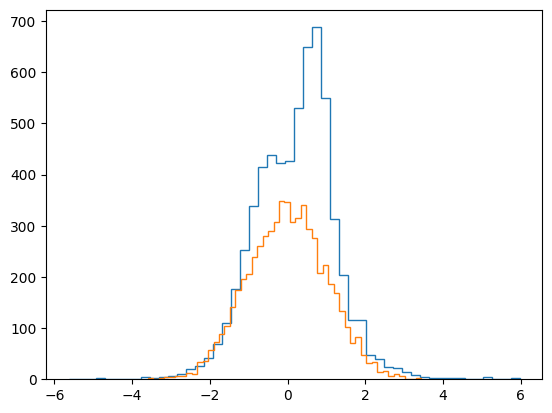

In [15]:
plt.hist((leading_energy_rel_entry_true-leading_energy_rel_entry_pred)/leading_energy_rel_entry_uncertainty, bins=50, histtype='step')
plt.hist(np.random.standard_normal(6117), bins=50, histtype='step')

In [16]:
print(np.mean((leading_energy_rel_entry_true-leading_energy_rel_entry_pred)/leading_energy_rel_entry_uncertainty))
np.std((leading_energy_rel_entry_true-leading_energy_rel_entry_pred)/leading_energy_rel_entry_uncertainty)

0.1944721878669159


1.0258818607617843

In [17]:
K_leading_energy_rel_entry_true=np.array([])
K_leading_energy_rel_entry_pred=np.array([])
K_leading_energy_rel_entry_uncertainty=np.array([])
for file in files0:
    f=h5py.File(file,'r')
    K_leading_energy_rel_entry_true=np.append(K_leading_energy_rel_entry_true, f['MCLabelsLeadingMuons']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_pred=np.append(K_leading_energy_rel_entry_pred,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_uncertainty=np.append(K_leading_energy_rel_entry_uncertainty,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry_uncertainty'])
for file in files1:
    f=h5py.File(file,'r')
    K_leading_energy_rel_entry_true=np.append(K_leading_energy_rel_entry_true, f['MCLabelsLeadingMuons']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_pred=np.append(K_leading_energy_rel_entry_pred,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_uncertainty=np.append(K_leading_energy_rel_entry_uncertainty,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry_uncertainty'])
for file in files2:
    f=h5py.File(file,'r')
    K_leading_energy_rel_entry_true=np.append(K_leading_energy_rel_entry_true, f['MCLabelsLeadingMuons']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_pred=np.append(K_leading_energy_rel_entry_pred,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_uncertainty=np.append(K_leading_energy_rel_entry_uncertainty,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry_uncertainty'])
for file in files3:
    f=h5py.File(file,'r')
    K_leading_energy_rel_entry_true=np.append(K_leading_energy_rel_entry_true, f['MCLabelsLeadingMuons']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_pred=np.append(K_leading_energy_rel_entry_pred,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_uncertainty=np.append(K_leading_energy_rel_entry_uncertainty,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry_uncertainty'])
K_leading_energy_rel_entry_pred=K_leading_energy_rel_entry_pred[np.isfinite(K_leading_energy_rel_entry_true)]
K_leading_energy_rel_entry_uncertainty=K_leading_energy_rel_entry_uncertainty[np.isfinite(K_leading_energy_rel_entry_true)]
K_leading_energy_rel_entry_true=K_leading_energy_rel_entry_true[np.isfinite(K_leading_energy_rel_entry_true)]
np.size(K_leading_energy_rel_entry_uncertainty)


26361

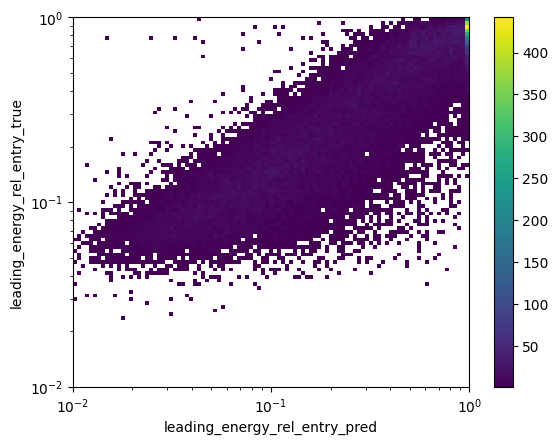

In [18]:
b=np.logspace(-2,0,100)
plt.hist2d(K_leading_energy_rel_entry_true,K_leading_energy_rel_entry_pred,bins=b, cmin=1)
plt.xlabel('leading_energy_rel_entry_pred')
plt.ylabel('leading_energy_rel_entry_true')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

(array([4.000e+00, 3.000e+00, 6.000e+00, 7.000e+00, 1.500e+01, 2.300e+01,
        4.200e+01, 5.600e+01, 8.300e+01, 1.300e+02, 2.080e+02, 2.390e+02,
        3.380e+02, 4.390e+02, 5.550e+02, 7.580e+02, 8.380e+02, 1.012e+03,
        1.252e+03, 1.391e+03, 1.526e+03, 1.546e+03, 1.587e+03, 1.662e+03,
        1.708e+03, 1.629e+03, 1.525e+03, 1.373e+03, 1.244e+03, 1.073e+03,
        9.550e+02, 8.190e+02, 5.880e+02, 4.680e+02, 3.570e+02, 2.840e+02,
        1.950e+02, 1.190e+02, 9.500e+01, 7.800e+01, 5.300e+01, 3.600e+01,
        1.600e+01, 7.000e+00, 8.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00]),
 array([-3.79882792, -3.63844474, -3.47806156, -3.31767838, -3.15729519,
        -2.99691201, -2.83652883, -2.67614565, -2.51576246, -2.35537928,
        -2.1949961 , -2.03461292, -1.87422973, -1.71384655, -1.55346337,
        -1.39308019, -1.232697  , -1.07231382, -0.91193064, -0.75154746,
        -0.59116427, -0.43078109, -0.27039791, -0.11001473,  0.05036846,
         0.

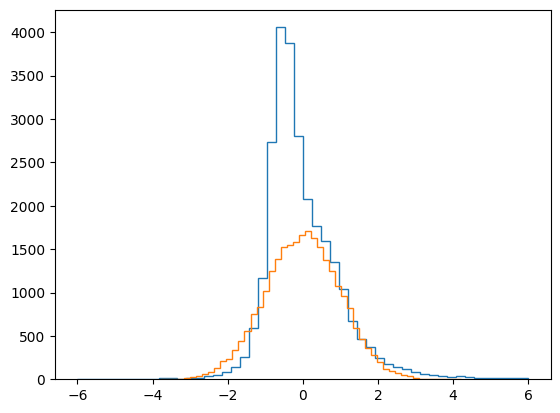

In [19]:
plt.hist((K_leading_energy_rel_entry_true-K_leading_energy_rel_entry_pred)/K_leading_energy_rel_entry_uncertainty, bins=50, histtype='step', range=[-6,6])
plt.hist(np.random.standard_normal(26361), bins=50, histtype='step')

In [20]:
print(np.mean((K_leading_energy_rel_entry_true-K_leading_energy_rel_entry_pred)/K_leading_energy_rel_entry_uncertainty))
np.std((K_leading_energy_rel_entry_true-K_leading_energy_rel_entry_pred)/K_leading_energy_rel_entry_uncertainty)

0.012354510164208157


1.0907009510700232

In [21]:
for file in files0:
    f=h5py.File(file,'r')
    K_leading_energy_rel_entry_true=np.append(K_leading_energy_rel_entry_true, f['MCLabelsLeadingMuons']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_pred=np.append(K_leading_energy_rel_entry_pred,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_uncertainty=np.append(K_leading_energy_rel_entry_uncertainty,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry_uncertainty'])
for file in files1:
    f=h5py.File(file,'r')
    K_leading_energy_rel_entry_true=np.append(K_leading_energy_rel_entry_true, f['MCLabelsLeadingMuons']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_pred=np.append(K_leading_energy_rel_entry_pred,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_uncertainty=np.append(K_leading_energy_rel_entry_uncertainty,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry_uncertainty'])
for file in files2:
    f=h5py.File(file,'r')
    K_leading_energy_rel_entry_true=np.append(K_leading_energy_rel_entry_true, f['MCLabelsLeadingMuons']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_pred=np.append(K_leading_energy_rel_entry_pred,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_uncertainty=np.append(K_leading_energy_rel_entry_uncertainty,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry_uncertainty'])
for file in files3:
    f=h5py.File(file,'r')
    K_leading_energy_rel_entry_true=np.append(K_leading_energy_rel_entry_true, f['MCLabelsLeadingMuons']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_pred=np.append(K_leading_energy_rel_entry_pred,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry'])
    K_leading_energy_rel_entry_uncertainty=np.append(K_leading_energy_rel_entry_uncertainty,f['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry_uncertainty'])


In [22]:
df_MCLabelsLeading=pd.DataFrame([])
df_DNN_energy=pd.DataFrame([])
df_MCLabelsParent=pd.DataFrame([])
df_weights=pd.DataFrame([])
df_Poly=pd.DataFrame([])
for file in files:
    df1=pd.read_hdf(file,key='MCLabelsLeadingMuons')
    df2=pd.read_hdf(file,key='DeepLearningReco_exported_model_PromptMu_L2_energy')
    df3=pd.read_hdf(file,key='MCLabelsMostEnergeticMuonParentInfo')
    df4=pd.read_hdf(file,key='weights')
    df5=pd.read_hdf(file,key='PolyplopiaPrimary')
    df_MCLabelsLeading=pd.concat([df_MCLabelsLeading,df1])
    df_DNN_energy=pd.concat([df_DNN_energy,df2])
    df_MCLabelsParent=pd.concat([df_MCLabelsParent,df3])
    df_weights=pd.concat([df_weights,df4])
    df_Poly=pd.concat([df_Poly,df5])
df_MCLabelsLeading.Event

/scratch/lflottau/lf/lib/python3.10/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'p_is_leading_muon_fr0.50_entry'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/scratch/lflottau/lf/lib/python3.10/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'p_is_leading_muon_fr0.50_mctree'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/scratch/lflottau/lf/lib/python3.10/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'p_is_leading_muon_fr0.90_entry'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use nat

0        0
1        1
2        3
3        4
4        5
      ... 
584    993
585    994
586    995
587    996
588    997
Name: Event, Length: 26368, dtype: uint32

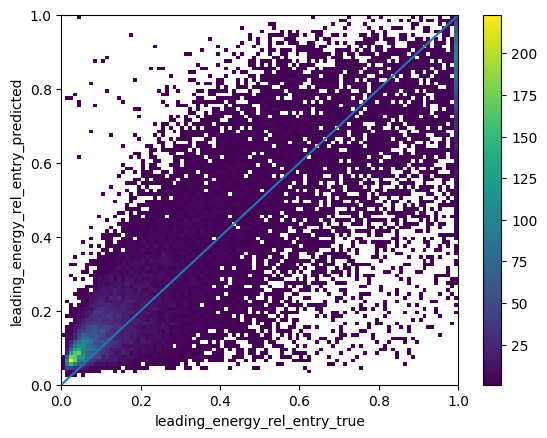

In [23]:
plt.hist2d(df_MCLabelsLeading.leading_energy_rel_entry,df_DNN_energy.leading_energy_rel_entry,bins=100,range=[[0,1],[0,1]],cmin=1)
plt.xlabel('leading_energy_rel_entry_true')
plt.ylabel('leading_energy_rel_entry_predicted')

plt.plot(np.linspace(0,1),np.linspace(0,1))
plt.colorbar()


26368

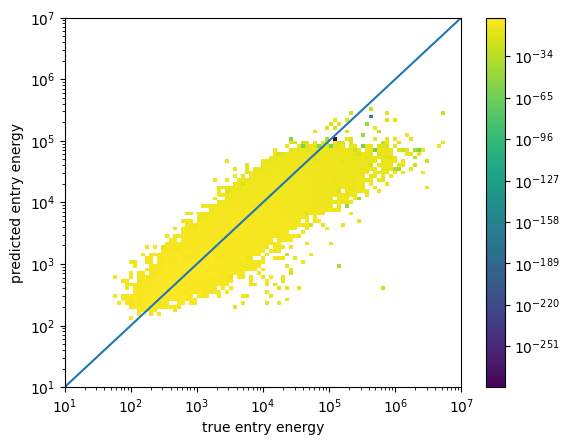

In [24]:
bins_entry=np.logspace(1,7,100)
plt.hist2d(df_MCLabelsLeading.entry_energy,df_DNN_energy.entry_energy,bins=bins_entry, range=[[np.min(df_MCLabelsLeading.entry_energy),np.max(df_MCLabelsLeading.entry_energy)],[np.min(df_DNN_energy.entry_energy),np.max(df_DNN_energy.entry_energy)]], weights=df_weights.GlobalFitGSTWeight,norm='log')
plt.xlabel('true entry energy')
plt.ylabel('predicted entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry)
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.colorbar()
np.size(df_MCLabelsLeading.entry_energy)

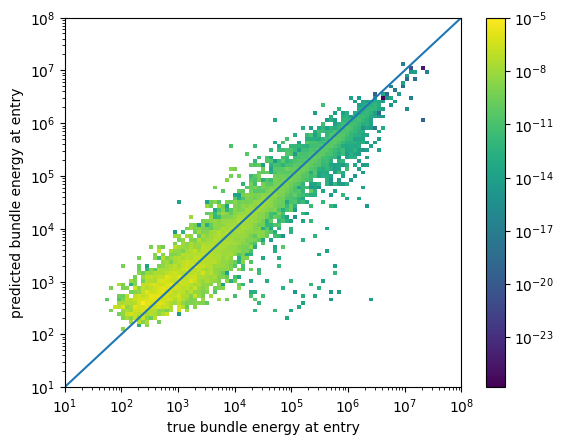

In [25]:
bins_bundle=np.logspace(1,8,100)
plt.hist2d(df_MCLabelsLeading.bundle_energy_at_entry,df_DNN_energy.bundle_energy_at_entry,bins=bins_bundle,weights=df_weights.GaisserH3aWeight,norm='log')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('true bundle energy at entry')
plt.ylabel('predicted bundle energy at entry')
plt.xlim([10**1,10**8])
plt.ylim([10**1,10**8])
plt.colorbar()
plt.plot(bins_bundle,bins_bundle)

In [26]:
np.mean(df_DNN_energy.entry_energy_log_uncertainty)
np.size(df_DNN_energy.entry_energy[df_DNN_energy.entry_energy_log_uncertainty<=np.mean(df_DNN_energy.entry_energy_log_uncertainty)])/np.size(df_DNN_energy.entry_energy)
entry_energy_pred_cut=df_DNN_energy.entry_energy[df_DNN_energy.entry_energy_log_uncertainty<=np.mean(df_DNN_energy.entry_energy_log_uncertainty)]
entry_energy_true_cut=df_MCLabelsLeading.entry_energy[df_DNN_energy.entry_energy_log_uncertainty<=np.mean(df_DNN_energy.entry_energy_log_uncertainty)]
np.max(df_DNN_energy.entry_energy_log_uncertainty)

2.8664817810058594

0.6077821601941747

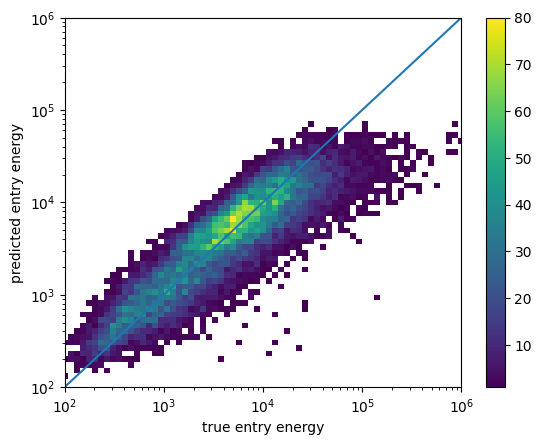

In [27]:
plt.hist2d(entry_energy_true_cut,entry_energy_pred_cut,bins=bins_entry, range=[[np.min(entry_energy_true_cut),np.max(entry_energy_true_cut)],[np.min(entry_energy_pred_cut),np.max(entry_energy_pred_cut)]],cmin=1)
plt.xlabel('true entry energy')
plt.ylabel('predicted entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry)
plt.xlim([10**2,10**6])
plt.ylim([10**2,10**6])
plt.colorbar()
np.size(entry_energy_pred_cut)/np.size(df_DNN_energy.entry_energy)

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 4.000e+00,
        4.000e+00, 7.000e+00, 9.000e+00, 9.000e+00, 2.900e+01, 2.600e+01,
        4.600e+01, 6.000e+01, 8.400e+01, 1.220e+02, 1.790e+02, 2.910e+02,
        4.260e+02, 5.360e+02, 8.100e+02, 9.990e+02, 1.374e+03, 1.741e+03,
        2.119e+03, 2.461e+03, 2.859e+03, 2.964e+03, 2.836e+03, 2.475e+03,
        1.818e+03, 1.128e+03, 5.510e+02, 2.490e+02, 9.100e+01, 3.500e+01,
        1.100e+01, 2.000e+00]),
 array([-10.36204733, -10.09320001,  -9.82435268,  -9.55550535,
         -9.28665802,  -9.0178107 ,  -8.74896337,  -8.48011604,
         -8.21126872,  -7.94242139,  -7.67357406,  -7.40472673,
         -7.13587941,  -6.86703208,  -6.59818475,  -6.32933743,
         -6.0604901 ,  -5.79164277,  -5.52279544,  -5.25394812,
         -4.98510079,  -4.71625346,  -4.44740613,  -4.17

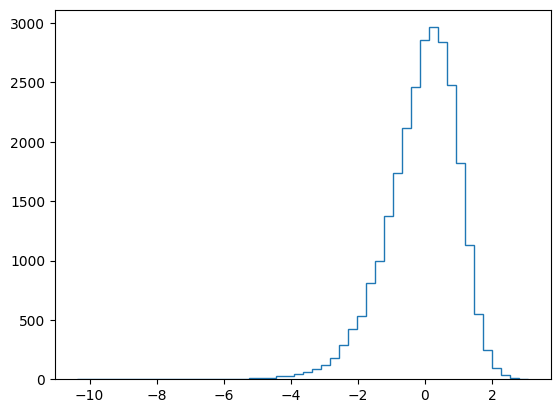

In [28]:
DElog_norm=(np.log(df_DNN_energy.entry_energy)-np.log(df_MCLabelsLeading.entry_energy))/df_DNN_energy.entry_energy_log_uncertainty
plt.hist(DElog_norm, bins=50, histtype='step')

0.5270403519417476

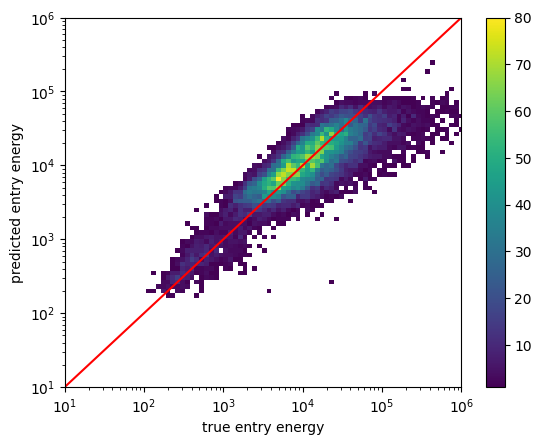

In [29]:
entry_energy_pred_cut2=df_DNN_energy.entry_energy[df_DNN_energy.entry_energy_log_uncertainty/np.log(df_DNN_energy.entry_energy)<=0.08]
entry_energy_true_cut2=df_MCLabelsLeading.entry_energy[df_DNN_energy.entry_energy_log_uncertainty/np.log(df_DNN_energy.entry_energy)<=0.08]
plt.hist2d(entry_energy_true_cut2,entry_energy_pred_cut2,bins=bins_entry,range=[[np.min(entry_energy_true_cut2),np.max(entry_energy_true_cut2)],[np.min(entry_energy_pred_cut2),np.max(entry_energy_pred_cut2)]],cmin=1)
plt.xlabel('true entry energy')
plt.ylabel('predicted entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry,'r')
plt.xlim([10**1,10**6])
plt.ylim([10**1,10**6])
plt.colorbar()
np.size(entry_energy_pred_cut2)/np.size(df_DNN_energy.entry_energy)

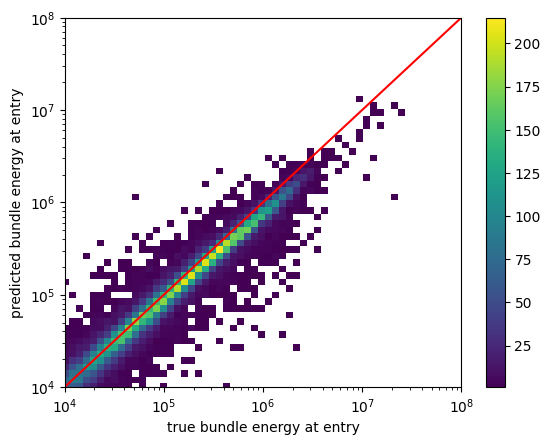

In [30]:
bins_bundle2=np.logspace(4,8,500)
plt.hist2d(df_MCLabelsLeading.bundle_energy_at_entry,df_DNN_energy.bundle_energy_at_entry,bins=bins_bundle,cmin=1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('true bundle energy at entry')
plt.ylabel('predicted bundle energy at entry')
plt.xlim([10**4,10**8])
plt.ylim([10**4,10**8])
plt.colorbar()
plt.plot(bins_bundle,bins_bundle,'r')

fraction prompt: 0.8440826549780839
fraction over 10**5 : 0.6703910614525139


0.8890321601941747

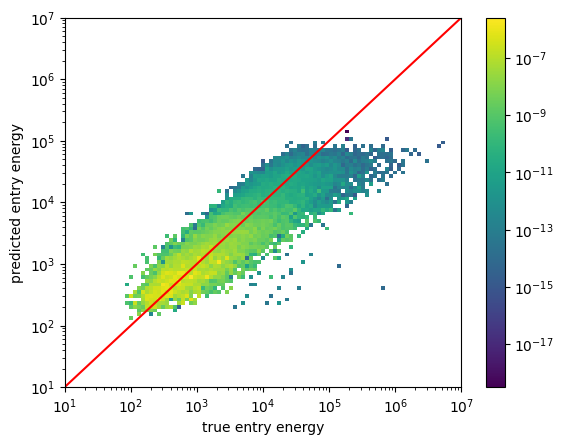

In [31]:
c=0.85
entry_energy_pred_cut3=df_DNN_energy.entry_energy[df_DNN_energy.entry_energy_log_uncertainty<=c]
entry_energy_true_cut3=df_MCLabelsLeading.entry_energy[df_DNN_energy.entry_energy_log_uncertainty<=c]
entry_energy_weights_cut3=df_weights[df_DNN_energy.entry_energy_log_uncertainty<=c]
entry_energy_Parent_cut3=df_MCLabelsParent[df_DNN_energy.entry_energy_log_uncertainty<=c]
plt.hist2d(entry_energy_true_cut3,entry_energy_pred_cut3,bins=bins_entry,range=[[np.min(entry_energy_true_cut3),np.max(entry_energy_true_cut3)],[np.min(entry_energy_pred_cut3),np.max(entry_energy_pred_cut3)]],weights=entry_energy_weights_cut3.GaisserH3aWeight,norm='log')
plt.xlabel('true entry energy')
plt.ylabel('predicted entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry,'r')
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.colorbar()
print('fraction prompt:',np.size(entry_energy_Parent_cut3.is_last_interaction_prompt_00[entry_energy_Parent_cut3.is_last_interaction_prompt_00==1])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_last_interaction_prompt_00==1]))
print('fraction over 10**5 :', np.size(entry_energy_true_cut3[entry_energy_true_cut3>=10**5])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>=10**5]))
np.size(entry_energy_pred_cut3)/np.size(df_DNN_energy.entry_energy)

In [32]:
p=0.9
cut=np.max(np.sort(df_DNN_energy.entry_energy_log_uncertainty)[0:round(p*np.size(df_DNN_energy.entry_energy_log_uncertainty))])
entry_energy_pred_cut_p=df_DNN_energy.entry_energy[df_DNN_energy.entry_energy_log_uncertainty<=np.quantile(df_DNN_energy.entry_energy_log_uncertainty,p)]
entry_energy_true_cut_p=df_MCLabelsLeading.entry_energy[df_DNN_energy.entry_energy_log_uncertainty<=np.quantile(df_DNN_energy.entry_energy_log_uncertainty,p)]
ParentInfo_entry_cut_p=df_MCLabelsParent[df_DNN_energy.entry_energy_log_uncertainty<=np.quantile(df_DNN_energy.entry_energy_log_uncertainty,p)]
print(np.quantile(df_DNN_energy.entry_energy_log_uncertainty,p))
cut

0.8616864204406738


0.8616716861724854

1367


0.8999924150485437

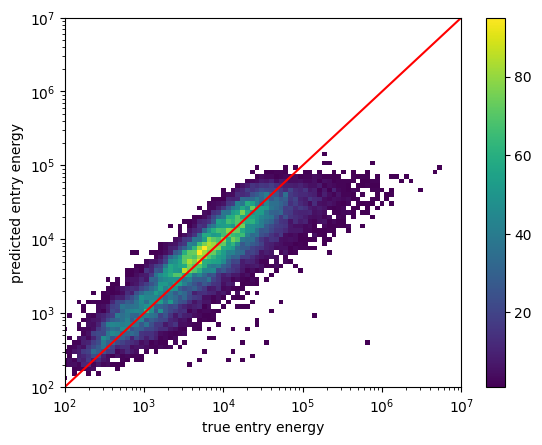

In [33]:
plt.hist2d(entry_energy_true_cut_p,entry_energy_pred_cut_p,bins=bins_entry,range=[[np.min(entry_energy_true_cut_p),np.max(entry_energy_true_cut_p)],[np.min(entry_energy_pred_cut_p),np.max(entry_energy_pred_cut_p)]],cmin=1)
plt.xlabel('true entry energy')
plt.ylabel('predicted entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry,'r')
plt.xlim([10**2,10**7])
plt.ylim([10**2,10**7])
plt.colorbar()
print(np.size(ParentInfo_entry_cut_p.is_last_interaction_prompt_00[ParentInfo_entry_cut_p.is_last_interaction_prompt_00==1]))
np.size(entry_energy_pred_cut_p)/np.size(df_DNN_energy.entry_energy)

0.5

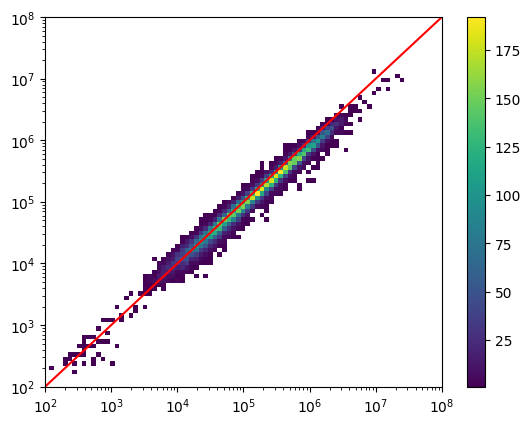

In [34]:
bundle_energy_pred_cut=df_DNN_energy.bundle_energy_at_entry[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=np.median(df_DNN_energy.bundle_energy_at_entry_log_uncertainty)]
bundle_energy_true_cut=df_MCLabelsLeading.bundle_energy_at_entry[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=np.median(df_DNN_energy.bundle_energy_at_entry_log_uncertainty)]
plt.hist2d(bundle_energy_true_cut,bundle_energy_pred_cut,bins=bins_bundle,cmin=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim([10**2,10**8])
plt.ylim([10**2,10**8])
plt.colorbar()
plt.plot(bins_bundle,bins_bundle,'r')
np.size(bundle_energy_pred_cut)/np.size(df_DNN_energy.bundle_energy_at_entry)

In [35]:
np.max(df_DNN_energy.bundle_energy_at_entry_log_uncertainty)

2.770967960357666

fraction prompt: 0.8165309956167814
fraction over 10**5: 0.8937732953299715


0.6567809466019418

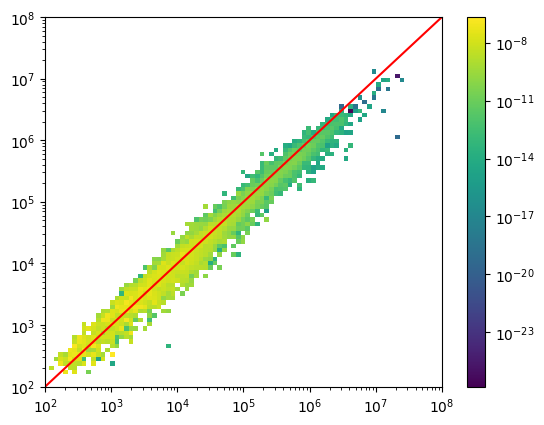

In [36]:
c2=0.43
#bundle_energy_pred_cut2=df_DNN_energy.bundle_energy_at_entry[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=0.2]
#bundle_energy_true_cut2=df_MCLabelsLeading.bundle_energy_at_entry[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=0.2]
bundle_energy_pred_cut2=df_DNN_energy[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=c2]
bundle_energy_true_cut2=df_MCLabelsLeading[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=c2]
ParentInfo_bundle_cut2=df_MCLabelsParent[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=c2]
weights_bundle_cut2=df_weights[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=c2]
plt.hist2d(bundle_energy_true_cut2.bundle_energy_at_entry,bundle_energy_pred_cut2.bundle_energy_at_entry,bins=bins_bundle,weights=weights_bundle_cut2.GaisserH3aWeight, norm='log')
plt.xscale('log')
plt.yscale('log')
plt.xlim([10**2,10**8])
plt.ylim([10**2,10**8])
plt.colorbar()
plt.plot(bins_bundle,bins_bundle,'r')
print('fraction prompt:',np.size(bundle_energy_pred_cut2.bundle_energy_at_entry[ParentInfo_bundle_cut2.is_last_interaction_prompt_00==1])/np.size(df_MCLabelsLeading.bundle_energy_at_entry[df_MCLabelsParent.is_last_interaction_prompt_00==1]))
print('fraction over 10**5:',np.size(bundle_energy_pred_cut2.bundle_energy_at_entry[bundle_energy_true_cut2.bundle_energy_at_entry>=10**5])/np.size(df_MCLabelsLeading.bundle_energy_at_entry[df_MCLabelsLeading.bundle_energy_at_entry>=10**5]))
np.size(bundle_energy_pred_cut2.bundle_energy_at_entry)/np.size(df_DNN_energy.bundle_energy_at_entry)

In [37]:
df_MCLabelsParent.keys()

Index(['Run', 'Event', 'SubEvent', 'SubEventStream', 'exists',
       'direct_parent_energy', 'direct_parent_pdg', 'first_interaction_energy',
       'first_interaction_pdg', 'first_prompt_energy_00',
       'first_prompt_num_decays_00', 'first_prompt_pdg_00',
       'is_first_interaction_prompt_00', 'is_last_interaction_prompt_00',
       'most_energetic_muon_energy', 'most_energetic_muon_num_decays'],
      dtype='object')

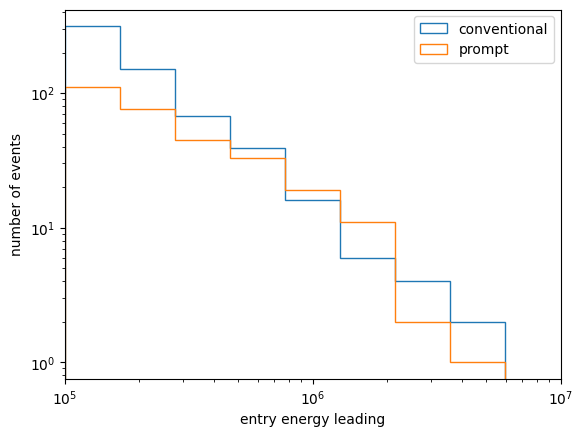

In [38]:
b=np.logspace(5,7,10)
plt.hist(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_last_interaction_prompt_00==0],bins=b,histtype='step', log=True, label='conventional')
#plt.hist(df_DNN_energy.entry_energy,bins=b,histtype='step')
plt.hist(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_last_interaction_prompt_00==1], bins=b, histtype='step',label='prompt')
plt.xscale('log')
plt.xlim([10**5,10**7])
plt.xlabel('entry energy leading')
plt.ylabel('number of events')
plt.legend()

0.021691486675990745


0.027754326673371923

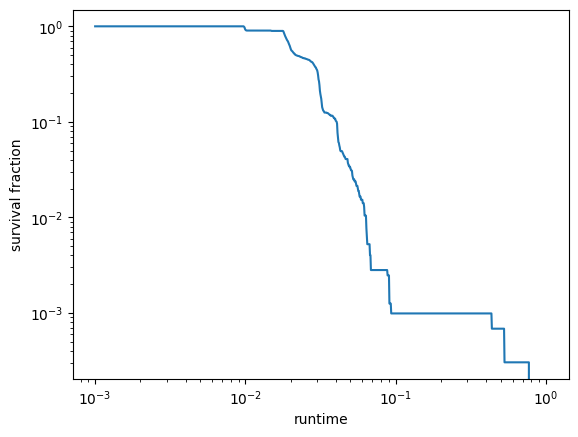

In [39]:
length=np.logspace(-3,0,1000)
runtime_survival_prediction=np.zeros(np.size(length))
for i in range(np.size(length)):
    runtime_survival_prediction[i]=np.size(df_DNN_energy.runtime_prediction[df_DNN_energy.runtime_prediction>=length[i]])/np.size(df_DNN_energy.runtime_prediction)
plt.plot(length,runtime_survival_prediction)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('runtime')
plt.ylabel('survival fraction')
print(np.median(df_DNN_energy.runtime_prediction))
np.mean(df_DNN_energy.runtime_prediction+df_DNN_energy.runtime_preprocess)


0.0009968560189008713


0.0017721670605416735

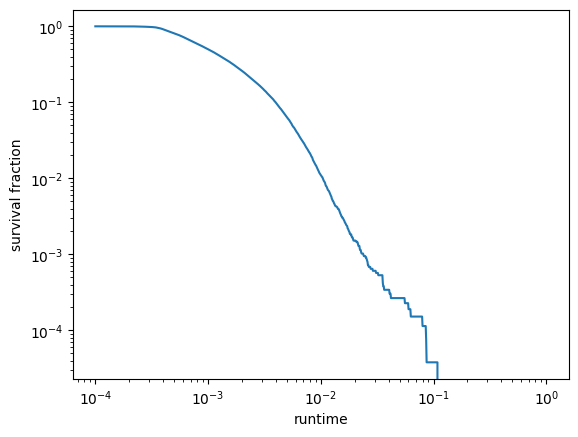

In [40]:
length2=np.logspace(-4,0,1000)
runtime_survival=np.zeros(np.size(length2))
for i in range(np.size(length2)):
    runtime_survival[i]=np.size(df_DNN_energy.runtime_preprocess[df_DNN_energy.runtime_preprocess>=length2[i]])/np.size(df_DNN_energy.runtime_preprocess)
plt.plot(length2,runtime_survival,)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('runtime')
plt.ylabel('survival fraction')
print(np.median(df_DNN_energy.runtime_preprocess))
np.mean(df_DNN_energy.runtime_preprocess)

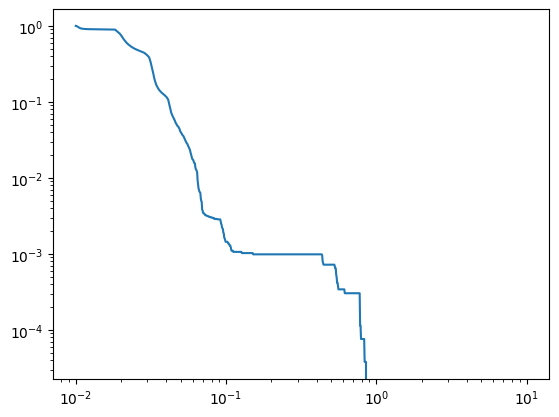

In [41]:
runtime_total=df_DNN_energy.runtime_prediction+df_DNN_energy.runtime_preprocess
length3=np.logspace(-2,1,1000)
runtime_survival_total=np.zeros(np.size(length3))
for i in range(np.size(length3)):
    runtime_survival_total[i]=np.size(runtime_total[runtime_total>=length3[i]])/np.size(runtime_total)
plt.plot(length3,runtime_survival_total)
plt.xscale('log')
plt.yscale('log')

<ErrorbarContainer object of 3 artists>

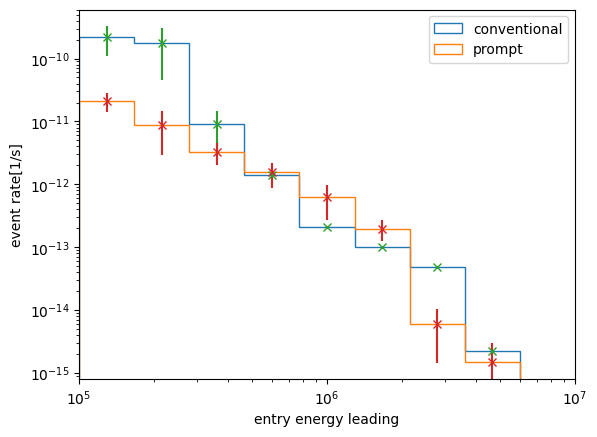

In [42]:
b=np.logspace(5,7,10)
plt.hist(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_last_interaction_prompt_00==0],bins=b,histtype='step', log=True, label='conventional', weights=df_weights.GaisserH3aWeight[df_MCLabelsParent.is_last_interaction_prompt_00==0])
plt.hist(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_last_interaction_prompt_00==1], bins=b, histtype='step',label='prompt', weights=df_weights.GaisserH3aWeight[df_MCLabelsParent.is_last_interaction_prompt_00==1])
plt.xscale('log')
plt.xlim([10**5,10**7])
plt.xlabel('entry energy leading')
plt.ylabel('event rate[1/s]')
plt.legend()
errors_conventional, error_edges_conventional=np.histogram(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_last_interaction_prompt_00==0],bins=b,weights=df_weights.GaisserH3aWeight[df_MCLabelsParent.is_last_interaction_prompt_00==0]**2)
errors_prompt, errors_edges_prompt=np.histogram(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_last_interaction_prompt_00==1],bins=b,weights=df_weights.GaisserH3aWeight[df_MCLabelsParent.is_last_interaction_prompt_00==1]**2)
conventional_weighted, bins_conv=np.histogram(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_last_interaction_prompt_00==0],bins=b, weights=df_weights.GaisserH3aWeight[df_MCLabelsParent.is_last_interaction_prompt_00==0])
prompt_weighted, bins_prompt=np.histogram(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_last_interaction_prompt_00==1],bins=b, weights=df_weights.GaisserH3aWeight[df_MCLabelsParent.is_last_interaction_prompt_00==1])
mid=10**(np.log10(b)[:(np.size(b)-1)]+np.diff(np.log10(b))/2)
plt.errorbar(mid,conventional_weighted,yerr=np.sqrt(errors_conventional),fmt='x')
plt.errorbar(mid,prompt_weighted,yerr=np.sqrt(errors_prompt),fmt='x')

4.844414070248604e-05

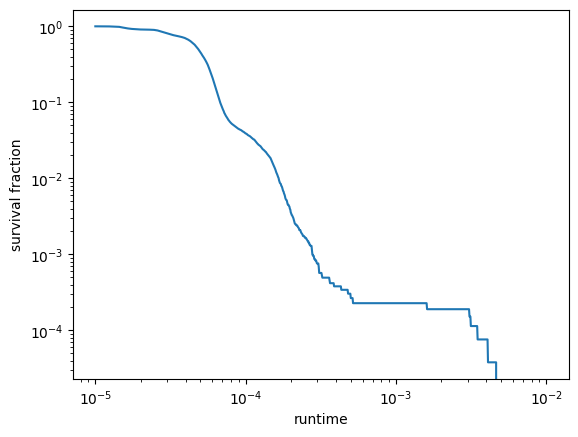

In [43]:
length=np.logspace(-5,-2,1000)
runtime_survival_write=np.zeros(np.size(length))
for i in range(np.size(length)):
    runtime_survival_write[i]=np.size(df_DNN_energy.runtime_write[df_DNN_energy.runtime_write>=length[i]])/np.size(df_DNN_energy.runtime_write)
plt.plot(length,runtime_survival_write)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('runtime')
plt.ylabel('survival fraction')
np.median(df_DNN_energy.runtime_write)


fraction prompt: 0.5979962429555417
fraction over 10**4: 0.49273787175180317


0.7094205097087378

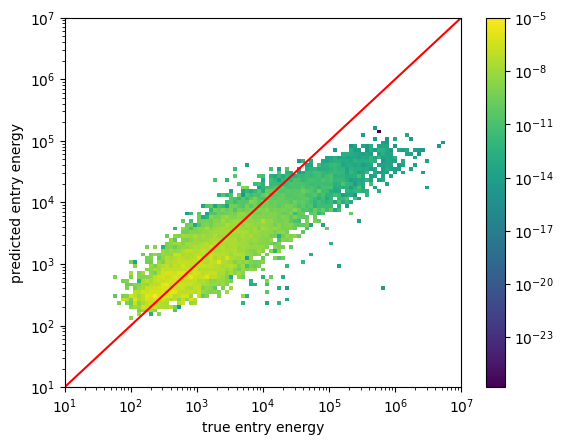

In [44]:
c_rel=0.1
entry_energy_pred_cut_rel=df_DNN_energy[df_MCLabelsLeading.leading_energy_rel_entry>=c_rel]
entry_energy_true_cut_rel=df_MCLabelsLeading[df_MCLabelsLeading.leading_energy_rel_entry>=c_rel]
entry_energy_weights_cut_rel=df_weights[df_MCLabelsLeading.leading_energy_rel_entry>=c_rel]
entry_energy_Parent_cut_rel=df_MCLabelsParent[df_MCLabelsLeading.leading_energy_rel_entry>=c_rel]
plt.hist2d(entry_energy_true_cut_rel.entry_energy,entry_energy_pred_cut_rel.entry_energy,bins=bins_entry,range=[[np.min(entry_energy_true_cut_rel.entry_energy),np.max(entry_energy_true_cut_rel.entry_energy)],[np.min(entry_energy_pred_cut_rel.entry_energy),np.max(entry_energy_pred_cut_rel.entry_energy)]],weights=entry_energy_weights_cut_rel.GaisserH3aWeight,norm='log')
plt.xlabel('true entry energy')
plt.ylabel('predicted entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry,'r')
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.colorbar()
print('fraction prompt:',np.size(entry_energy_Parent_cut_rel.is_last_interaction_prompt_00[entry_energy_Parent_cut_rel.is_last_interaction_prompt_00==1])/np.size(df_MCLabelsParent.is_last_interaction_prompt_00[df_MCLabelsParent.is_last_interaction_prompt_00==1]))
print('fraction over 10**4:', np.size(entry_energy_true_cut_rel.entry_energy[entry_energy_true_cut_rel.entry_energy>=10**4])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>=10**4]))
np.size(entry_energy_pred_cut_rel.entry_energy)/np.size(df_DNN_energy.entry_energy)

fraction prompt: 0.5979962429555417
fraction over 10**5: 0.16918621488560673


0.7094205097087378

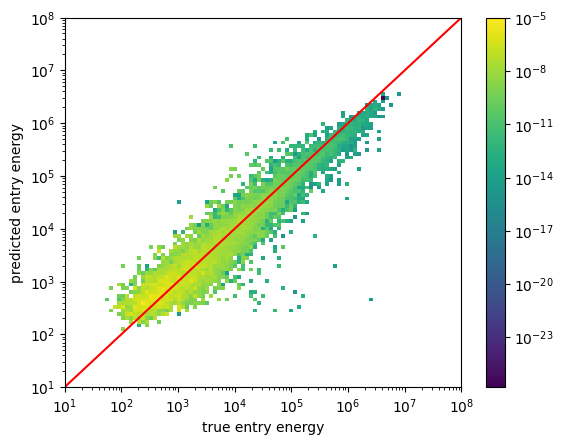

In [45]:

plt.hist2d(entry_energy_true_cut_rel.bundle_energy_at_entry,entry_energy_pred_cut_rel.bundle_energy_at_entry,bins=bins_bundle,weights=entry_energy_weights_cut_rel.GaisserH3aWeight,norm='log')
plt.xlabel('true entry energy')
plt.ylabel('predicted entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_bundle,bins_bundle,'r')
plt.xlim([10**1,10**8])
plt.ylim([10**1,10**8])
plt.colorbar()
print('fraction prompt:',np.size(entry_energy_Parent_cut_rel.is_last_interaction_prompt_00[entry_energy_Parent_cut_rel.is_last_interaction_prompt_00==1])/np.size(df_MCLabelsParent.is_last_interaction_prompt_00[df_MCLabelsParent.is_last_interaction_prompt_00==1]))
print('fraction over 10**5:', np.size(entry_energy_true_cut_rel.bundle_energy_at_entry[entry_energy_true_cut_rel.bundle_energy_at_entry>=10**5])/np.size(df_MCLabelsLeading.bundle_energy_at_entry[df_MCLabelsLeading.bundle_energy_at_entry>=10**4]))
np.size(entry_energy_pred_cut_rel.entry_energy)/np.size(df_DNN_energy.entry_energy)

In [46]:
print(np.mean(df_MCLabelsLeading.num_muons_at_entry[df_MCLabelsLeading.leading_energy_rel_entry>=c_rel]))
np.mean(df_MCLabelsLeading.num_muons_at_entry)

121.40863893937774


410.8129171723301

In [47]:
high_energy=df_MCLabelsLeading[df_MCLabelsLeading.entry_energy>=10**5]
print(np.mean(high_energy.num_muons_at_entry[high_energy.leading_energy_rel_entry>=0.2]))
np.mean(high_energy.num_muons_at_entry)

1003.9791231732777


2311.708379888268

fraction prompt: 0.6875391358797746
fraction over 10**4: 0.7972532358462603


0.5448649878640777

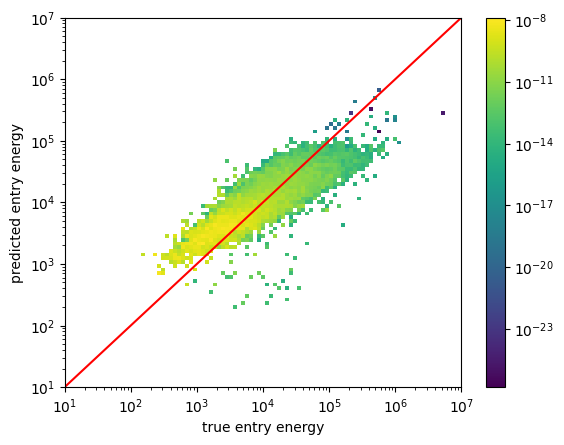

In [48]:
entry_energy_pred_cut_rel=df_DNN_energy[df_MCLabelsLeading.leading_energy_rel_entry<=0.25]
entry_energy_true_cut_rel=df_MCLabelsLeading[df_MCLabelsLeading.leading_energy_rel_entry<=0.25]
entry_energy_weights_cut_rel=df_weights[df_MCLabelsLeading.leading_energy_rel_entry<=0.25]
entry_energy_Parent_cut_rel=df_MCLabelsParent[df_MCLabelsLeading.leading_energy_rel_entry<=0.25]
plt.hist2d(entry_energy_true_cut_rel.entry_energy,entry_energy_pred_cut_rel.entry_energy,bins=bins_entry,range=[[np.min(entry_energy_true_cut_rel.entry_energy),np.max(entry_energy_true_cut_rel.entry_energy)],[np.min(entry_energy_pred_cut_rel.entry_energy),np.max(entry_energy_pred_cut_rel.entry_energy)]],weights=entry_energy_weights_cut_rel.GaisserH3aWeight,norm='log')
plt.xlabel('true entry energy')
plt.ylabel('predicted entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry,'r')
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.colorbar()
print('fraction prompt:',np.size(entry_energy_Parent_cut_rel.is_last_interaction_prompt_00[entry_energy_Parent_cut_rel.is_last_interaction_prompt_00==1])/np.size(df_MCLabelsParent.is_last_interaction_prompt_00[df_MCLabelsParent.is_last_interaction_prompt_00==1]))
print('fraction over 10**4:', np.size(entry_energy_true_cut_rel.entry_energy[entry_energy_true_cut_rel.entry_energy>=10**4])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>=10**4]))
np.size(entry_energy_pred_cut_rel.entry_energy)/np.size(df_DNN_energy.entry_energy)

fraction prompt: 0.839073262366938
fraction over 10**4: 0.8697757138622666
fraction total 0.9500151699029126


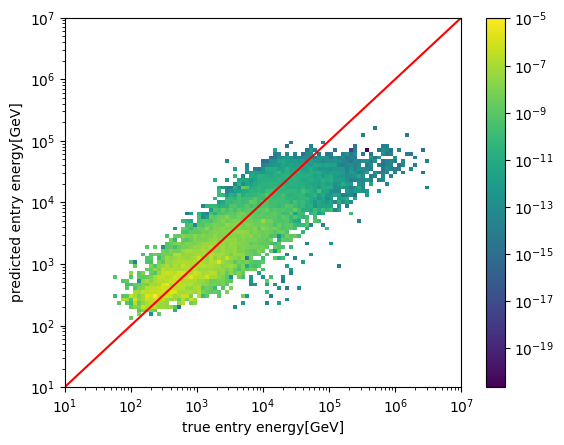

In [49]:
multiplicity_cut=np.quantile(df_MCLabelsLeading.num_muons_at_entry,0.95)
multiplicity_cut_mask=df_MCLabelsLeading.num_muons_at_entry<=multiplicity_cut
entry_energy_pred_cut_mult=df_DNN_energy[multiplicity_cut_mask]
entry_energy_true_cut_mult=df_MCLabelsLeading[multiplicity_cut_mask]
entry_energy_weights_cut_mult=df_weights[multiplicity_cut_mask]
entry_energy_Parent_cut_mult=df_MCLabelsParent[multiplicity_cut_mask]
plt.hist2d(entry_energy_true_cut_mult.entry_energy,entry_energy_pred_cut_mult.entry_energy,bins=bins_entry,range=[[np.min(entry_energy_true_cut_mult.entry_energy),np.max(entry_energy_true_cut_mult.entry_energy)],[np.min(entry_energy_pred_cut_mult.entry_energy),np.max(entry_energy_pred_cut_mult.entry_energy)]],weights=entry_energy_weights_cut_mult.GaisserH3aWeight,norm='log')
plt.xlabel('true entry energy[GeV]')
plt.ylabel('predicted entry energy[GeV]')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry,'r')
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.colorbar()
print('fraction prompt:',np.size(entry_energy_Parent_cut_mult.is_last_interaction_prompt_00[entry_energy_Parent_cut_mult.is_last_interaction_prompt_00==1])/np.size(df_MCLabelsParent.is_last_interaction_prompt_00[df_MCLabelsParent.is_last_interaction_prompt_00==1]))
print('fraction over 10**4:', np.size(entry_energy_true_cut_mult.entry_energy[entry_energy_true_cut_mult.entry_energy>=10**4])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>=10**4]))
print('fraction total', np.size(entry_energy_true_cut_mult.entry_energy)/np.size(df_MCLabelsLeading.entry_energy))

In [50]:
true_bundle_digitized=np.digitize(df_MCLabelsLeading.bundle_energy_at_entry, bins_bundle)-1
A=np.ones([np.size(bins_bundle),np.size(bins_bundle)])
f=np.ones(np.size(bins_bundle_short)-1)
for i in range(np.size(bins_bundle_short)-1):
    predicted_bin_i_digitized=np.digitize(df_DNN_energy.bundle_energy_at_entry[true_bundle_digitized==i], bins_bundle_short)-1
    #print(np.size(predicted_bin_i_digitized))
    f[i]=np.size(predicted_bin_i_digitized)
    for j in range(np.size(bins_bundle_short)):
        x=1
        #print(np.size(predicted_bin_i_digitized[predicted_bin_i_digitized==j]))
        #A[j,i]=np.size(predicted_bin_i_digitized[predicted_bin_i_digitized==j])/np.size(predicted_bin_i_digitized)

NameError: name 'bins_bundle_short' is not defined

In [ ]:
random=np.random.uniform(size=np.size(df_MCLabelsLeading.bundle_energy_at_entry))

In [ ]:
df_MCLabelsLeading_test=df_MCLabelsLeading[random<=0.5]
df_DNN_energy_test=df_DNN_energy[random<=0.5]
df_MCLabelsLeading_train=df_MCLabelsLeading[random>0.5]
df_DNN_energy_train=df_DNN_energy[random>0.5]
A, xb, yb=np.histogram2d(df_DNN_energy_train.bundle_energy_at_entry,df_MCLabelsLeading_train.bundle_energy_at_entry,bins=bins_bundle)
As=np.sum(A,axis=0)
for i in range(np.size(bins_bundle)-1):
    if As[i]!=0:
        A[:,i]=A[:,i]/As[i]
As    


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.,   1.,   7.,   9.,  14.,  13.,  36.,  43.,  75.,  96., 116.,
       136., 159., 162., 181., 174., 191., 187., 216., 213., 217., 253.,
       232., 222., 233., 199., 210., 213., 211., 225., 191., 205., 261.,
       265., 256., 282., 290., 291., 293., 318., 317., 322., 300., 309.,
       313., 311., 290., 286., 316., 312., 274., 295., 256., 280., 288.,
       257., 258., 235., 220., 178., 164., 138., 106., 104.,  77.,  34.,
        24.,   5.,   3.,   2.,   2.,   2.,   1.,   2.,   3.,   0.,   0.,
         0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [ ]:
f,xb=np.histogram(df_MCLabelsLeading_train.bundle_energy_at_entry, bins=bins_bundle)
g,xb=np.histogram(df_DNN_energy_train.bundle_energy_at_entry, bins=bins_bundle)
print(g)
A@f

NameError: name 'np' is not defined

In [ ]:
np.mean([1,3])
Ainv=np.linalg.pinv(A,0.4)
f_test,b_test=np.histogram(df_MCLabelsLeading_test.bundle_energy_at_entry,bins=bins_bundle)
g_test,b_test=np.histogram(df_DNN_energy_test.bundle_energy_at_entry,bins=bins_bundle)
plt.xscale('log')
#plt.hist(df_MCLabelsLeading_test.bundle_energy_at_entry,bins=bins_bundle, histtype='step')
plt.step(bins_bundle[:99],f_test,where='post')
plt.step(bins_bundle[:99],g_test,where='post')
plt.step(bins_bundle[:99],Ainv@f_test)

NameError: name 'np' is not defined

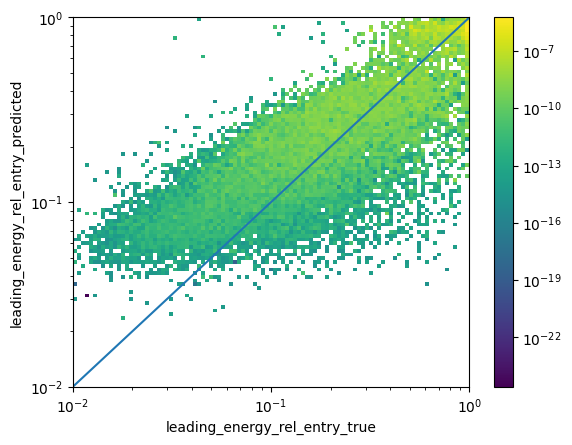

In [ ]:
rel_entry_cut=df_DNN_energy.leading_energy_rel_entry_uncertainty<=0.2
rel_entry_cut_DNN=df_DNN_energy[rel_entry_cut]
rel_entry_cut_MCLabels=df_MCLabelsLeading[rel_entry_cut]
rel_entry_cut_Parent=df_MCLabelsParent[rel_entry_cut]
rel_entry_cut_weights=df_weights[rel_entry_cut]
plt.hist2d(rel_entry_cut_MCLabels.leading_energy_rel_entry,rel_entry_cut_DNN.leading_energy_rel_entry,bins=np.logspace(-2,0,100),range=[[0,1],[0,1]], weights=rel_entry_cut_weights.GaisserH3aWeight,norm='log')
plt.xlabel('leading_energy_rel_entry_true')
plt.ylabel('leading_energy_rel_entry_predicted')
plt.xscale('log')
plt.yscale('log')
plt.plot(np.linspace(0,1),np.linspace(0,1))
plt.colorbar()
